# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
# <a href=https://www.ramp.studio/problems/covertype>RAMP</a> on predicting forest type

<i> Balázs Kégl (LAL/CNRS), Alex Gramfort (INRIA)</i>

In [28]:
from __future__ import division
from __future__ import print_function

%matplotlib inline
import imp
import numpy as np
import pandas as pd
import pylab as plt

## Introduction

## Fetch the data and load it in pandas

First we load `problem.py` that parameterizes the challenge. It contains some objects taken off the shelf from `ramp-workflow` (e.g., `Predictions` type, scores, and data reader). 

In [29]:
problem = imp.load_source('', 'problem.py')

`get_train_data` loads the training data and returns an `pandas` object (input) and a `np.array` object (output).

In [30]:
X_df, y_array = problem.get_train_data()

In [31]:
X_df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,12133,2704,87,20,0,0,240,245,202,78,...,0,0,0,0,0,0,0,0,0,0
1,5499,2379,14,34,212,36,642,169,151,101,...,0,0,0,0,0,0,0,0,0,0
2,11475,2998,123,11,85,13,5130,239,232,122,...,0,0,0,0,0,0,0,0,0,0
3,11367,2686,67,8,430,4,1673,228,224,129,...,0,0,0,0,0,0,0,0,0,0
4,6850,2790,219,25,306,169,626,183,254,196,...,0,0,1,0,0,0,0,0,0,0


In [32]:
X_df.columns

Index([u'Unnamed: 0', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_T

In [33]:
X_df.describe()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,...,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000
mean,7550.417460,2749.302646,155.563624,16.439815,226.554497,50.894048,1714.376058,213.084392,219.019180,134.754101,...,0.021561,0.045767,0.038889,0.001984,0.007407,0.000661,0.001720,0.048413,0.042593,0.031085
std,4370.177307,417.620968,109.838482,8.419079,209.850602,61.527995,1332.411569,30.316041,22.567381,45.668769,...,0.145254,0.208994,0.193343,0.044502,0.085753,0.025710,0.041435,0.214651,0.201950,0.173558
min,2.000000,1874.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,58.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3787.750000,2378.000000,64.000000,10.000000,67.000000,4.000000,757.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7521.500000,2750.000000,124.000000,15.000000,180.000000,32.000000,1301.500000,220.000000,222.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11323.500000,3102.000000,257.000000,22.000000,324.000000,79.000000,2264.250000,236.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15119.000000,3849.000000,359.000000,50.000000,1318.000000,554.000000,6811.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_df.dtypes

Unnamed: 0                            int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [35]:
full_data_df = X_df.copy()
full_data_df['Cover_Type'] = y_array
full_data_df.groupby('Cover_Type').count()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
2,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
3,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
4,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
5,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
6,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
7,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080


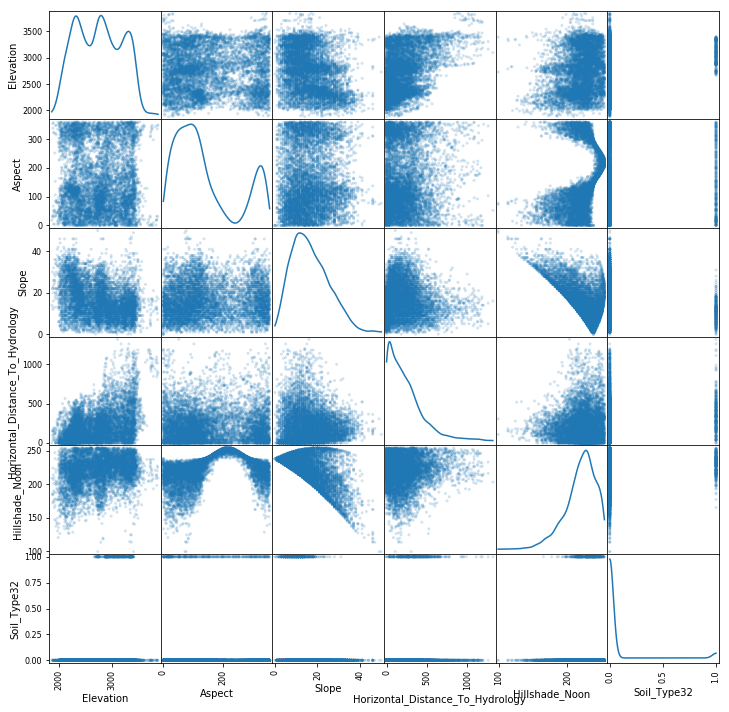

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(
    X_df.get(
        ['Elevation', 'Aspect', 'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Hillshade_Noon', 'Soil_Type32']),
    alpha=0.2, figsize=(12, 12), diagonal='kde');

<Figure size 864x576 with 0 Axes>

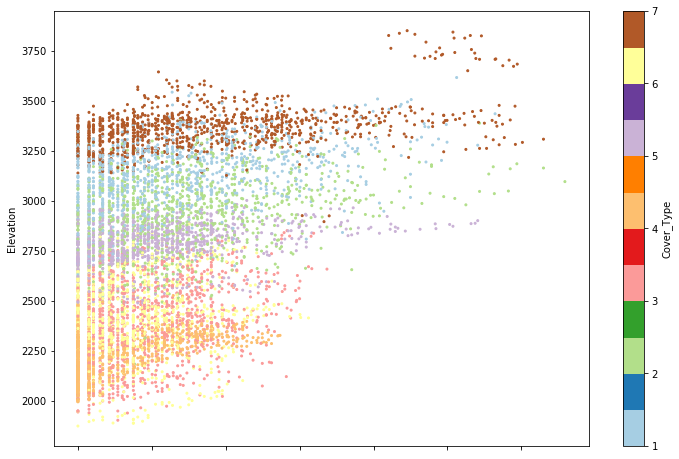

In [37]:
plt.figure(figsize=(12, 8));
full_data_df.plot(
    kind='scatter', x='Horizontal_Distance_To_Hydrology',
    y='Elevation', c='Cover_Type', s=4, cmap=plt.cm.Paired,
    figsize=(12, 8));

### A linear regressor baseline

In [38]:
X_array = X_df.values

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_array, y_array, test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.6564 +/- 0.0195


## Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
max_depth = 10
max_features = 10
clf = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring='accuracy')
print("RMSE: {:.4f} +/- {:.4f}".format(
    np.mean(scores), np.std(scores)))

RMSE: 0.7680 +/- 0.0091


## Variable importances

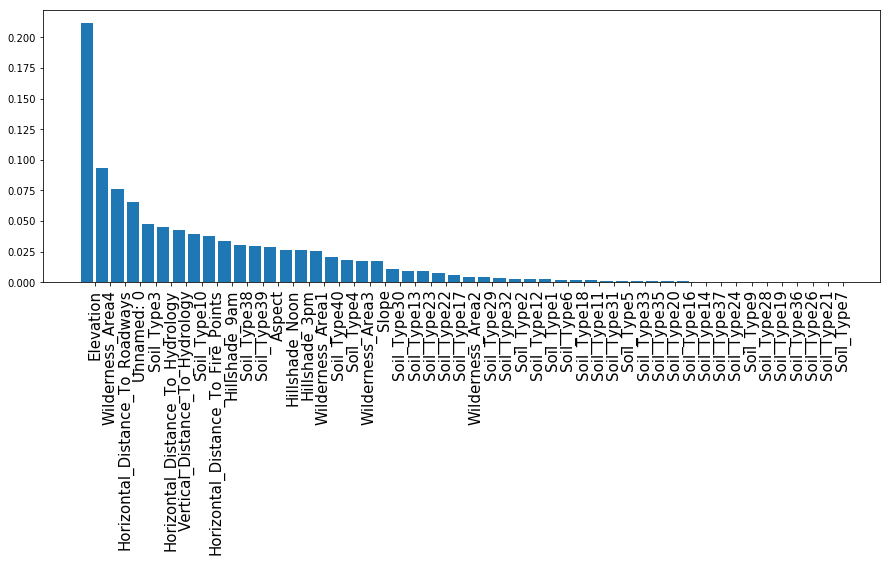

In [42]:
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 5))

ordering = np.argsort(clf.feature_importances_)[::-1][:50]

importances = clf.feature_importances_[ordering]
feature_names = X_df.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Building predictive models

### The feature extractor

The feature extractor implements a single <code>transform</code> function. It receives the full pandas object X_df (without the labels). It should produce a numpy array representing the features extracted. If you want to use the (training) labels to save some state of the feature extractor, you can do it in the fit function.

In [43]:
import pandas as pd


class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        return X_df.values


In [44]:
fe = FeatureExtractor()
fe.fit(X_df, y_array)
X_array = fe.transform(X_df)
X_array.shape

(7560, 55)

### The classifier

The classifer should implement an sklearn-like classifier with `fit` and `predict_proba` functions.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = LogisticRegression(C=1.)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [46]:
clf = Classifier()
clf.fit(X_array, y_array)
y_proba = clf.predict_proba(X_array)

In [48]:
score_type = problem.score_types[0]

In [49]:
# We need to convert y_proba into winning label names
y_pred_labels = np.array(problem._prediction_label_names)[np.argmax(y_proba, axis=1)]
score = score_type(y_array, y_pred_labels)
score

0.65410052910052907

In [50]:
X_test_df, y_test_array = problem.get_test_data()

In [51]:
X_test_array = fe.transform(X_test_df)
y_test_proba = clf.predict_proba(X_test_array)
y_test_pred_labels = np.array(
    problem._prediction_label_names)[np.argmax(y_test_proba, axis=1)]
score_type(y_test_array, y_test_pred_labels)

0.64828042328042323

In [52]:
cv = problem.get_cv(X_df, y_array)
valid_scores = np.array([])
for fold in cv:
    train_is, valid_is = fold
    X_fold_train = X_df.iloc[train_is]
    y_fold_train = y_array[train_is]
    X_fold_valid = X_df.iloc[valid_is]
    y_fold_valid = y_array[valid_is]
    fe.fit(X_fold_train, y_fold_train)
    X_fold_train_array = fe.transform(X_fold_train)
    clf.fit(X_fold_train_array, y_fold_train)
    X_fold_valid_array = fe.transform(X_fold_valid)
    y_fold_valid_proba = clf.predict_proba(X_fold_valid_array)
    y_fold_valid_pred_labels = np.array(
        problem._prediction_label_names)[np.argmax(y_fold_valid_proba, axis=1)]
    valid_score = score_type(y_fold_valid, y_fold_valid_pred_labels)
    valid_scores = np.append(valid_scores, valid_score)
print('validation scores =', valid_scores)
print('validation score mean =', valid_scores.mean())
print('validation score std =', valid_scores.std())

validation scores = [ 0.63955026  0.66468254  0.64616402  0.64880952  0.65608466  0.64748677
  0.62830688  0.65542328]
validation score mean = 0.648313492063
validation score std = 0.0103772243945


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit).

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](http://localhost:8890/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](http://localhost:8890/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [53]:
!ramp_test_submission

Testing Forest type classification
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.66  0.598  0.86
	train  0.67  0.619  0.83
	valid  0.64  0.586  0.88
CV fold 1
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.66  0.600  0.85
	train  0.66  0.608  0.84
	valid  0.66  0.600  0.82
CV fold 2
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.65  0.596  0.88
	train  0.66  0.604  0.86
	valid  0.65  0.596  0.89
CV fold 3
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.66  0.602  0.86
	train  0.67  0.609  0.84
	valid  0.65  0.593  0.87
CV fold 4
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.65  0.588  0.88
	train  0.66  0.598  0.87
	valid  0.65  0.593  0.89
CV fold 5
Couldn't re-order the score matrix..
	score   acc    bac   nll
	test   0.66  0.598  0.84
	train  0.6